In [ ]:
print ('Hello World')

In [ ]:
def say_hello(recip):
    return 'Hello, {}!'.format(recip)
say_hello ('Tim')

In [ ]:
import time
time.sleep(3)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

sns.set(style="darkgrid")
def square(x):
    return x * x

# create sparksession
spark = SparkSession \
    .builder \
    .appName("Pysparkexample") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()

In [ ]:
%%timeit
df = spark.read.csv('Vermont_Vendor_Payments.csv', header='true')

In [2]:
df = spark.read.csv('data/Vermont_Vendor_Payments.csv', header='true', inferSchema = True)
df = df.withColumn("Amount", df["Amount"].cast("double"))

columns = df.columns
print ('The column Names are:')
for i in columns:
    print(i)
print ('The total number of rose is:',df.count(), '\nThe total numbers of coluns is:', len(df.columns))

df.show(5)

The column Names are:
Quarter Ending
Department
UnitNo
Vendor Number
Vendor
City
State
DeptID Description
DeptID
Amount
Account
AcctNo
Fund Description
Fund
The total number of rose is: 1555843 
The total numbers of coluns is: 14
+--------------+--------------------+------+-------------+--------------------+----------+-----+--------------------+----------+------+--------------------+------+--------------------+-----+
|Quarter Ending|          Department|UnitNo|Vendor Number|              Vendor|      City|State|  DeptID Description|    DeptID|Amount|             Account|AcctNo|    Fund Description| Fund|
+--------------+--------------------+------+-------------+--------------------+----------+-----+--------------------+----------+------+--------------------+------+--------------------+-----+
|    03/31/2019|              Health|  3420|   0000283499|    A T & T Mobility|   Atlanta|   GA|       LH Rutland DO|3420021509| 58.08|Telecom-Wireless ...|516659|Federal Revenue Fund|22005|
|    0

In [ ]:
df.head()

In [ ]:
df.describe().show()

In [ ]:
# I will start by creating a temporary table query with SQL
df.createOrReplaceTempView('VermontVendor')
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

In [7]:
df.select('Quarter Ending', 'Department', 'Amount', 'State').show(10)

+--------------+--------------------+--------+-----+
|Quarter Ending|          Department|  Amount|State|
+--------------+--------------------+--------+-----+
|    03/31/2019|              Health|   58.08|   GA|
|    03/31/2019|Environmental Con...|  3239.4|   VT|
|    03/31/2019|       Public Safety|  469.23|   GA|
|    03/31/2019|Environmental Con...|  1533.0|   VT|
|    03/31/2019|              Health|   88.05|   GA|
|    03/31/2019|Environmental Con...| 14966.0|   VT|
|    03/31/2019|Children and Fami...|   336.8|   GA|
|    03/31/2019|Environmental Con...|23613.59|   VT|
|    03/31/2019|              Health|   58.08|   GA|
|    03/31/2019|Forests, Parks & ...|   819.0|   VT|
+--------------+--------------------+--------+-----+
only showing top 10 rows



In [4]:
# I will start by creating a temporary table query with SQL
df.createOrReplaceTempView('VermontVendor')
spark.sql(
'''
SELECT `Quarter Ending`, Department, Amount, State FROM VermontVendor
LIMIT 10
'''
).show()

+--------------+--------------------+--------+-----+
|Quarter Ending|          Department|  Amount|State|
+--------------+--------------------+--------+-----+
|    03/31/2019|              Health|   58.08|   GA|
|    03/31/2019|Environmental Con...|  3239.4|   VT|
|    03/31/2019|       Public Safety|  469.23|   GA|
|    03/31/2019|Environmental Con...|  1533.0|   VT|
|    03/31/2019|              Health|   88.05|   GA|
|    03/31/2019|Environmental Con...| 14966.0|   VT|
|    03/31/2019|Children and Fami...|   336.8|   GA|
|    03/31/2019|Environmental Con...|23613.59|   VT|
|    03/31/2019|              Health|   58.08|   GA|
|    03/31/2019|Forests, Parks & ...|   819.0|   VT|
+--------------+--------------------+--------+-----+



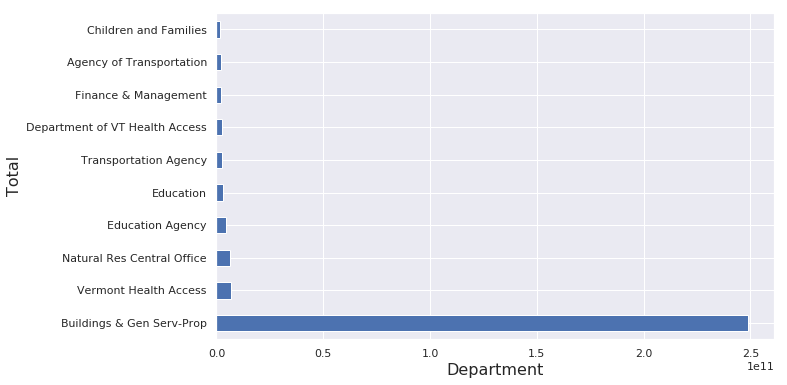

In [5]:
plot_df = spark.sql(
'''

SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
ORDER BY Total DESC
LIMIT 10

'''
).toPandas()


fig,ax = plt.subplots(1,1,figsize=(10,6))
plot_df.plot(x = 'Department', y = 'Total', kind = 'barh', color = 'C0', ax = ax, legend = False)
ax.set_xlabel('Department', size = 16)
ax.set_ylabel('Total', size = 16)
plt.savefig('barplot.png')
plt.show()

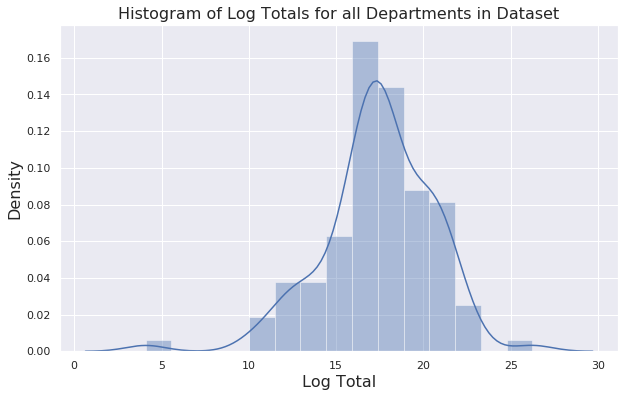

In [6]:
plot_df2 = spark.sql(
'''
SELECT Department, SUM(Amount) as Total FROM VermontVendor 
GROUP BY Department
'''
).toPandas()
plt.figure(figsize = (10,6))
sns.distplot(np.log(plot_df2['Total']))
plt.title('Histogram of Log Totals for all Departments in Dataset', size = 16)
plt.ylabel('Density', size = 16)
plt.xlabel('Log Total', size = 16)
plt.savefig('distplot.png')
plt.show()

In [ ]:
%%timeit
dv_pandas = pd.read_csv('Vermont_Vendor_Payments.csv', low_memory = False)

In [ ]:
y = 10

In [ ]:
x = np.random.randint(1,10)
y = square(x)
print ('Is %d squared is %d?' % (x,y))

## Title
# This is a markdown cell. You can see that it doesn't have any [] in it.
